## 数组操作

|函数|描述|
|:---|:---|
|reshape|不改变数据的条件下修改形状|
|flat|数组元素迭代器|
|flatten|返回一份数组拷贝，对拷贝所做的修改不会影响原始数组|
|ravel|返回展开数组|

In [26]:
# !pip install numpy
import numpy as np
# from PIL import Image
import cv2

SplitLine = "\n==============================\n"

def ArrayAttr(x):
    print(f"维度数(秩)：{x.ndim}; 元素类型：{x.dtype}; 数组的维度形状：{x.shape}; 元素个数：{x.size}; 元素的字节大小：{x.itemsize}", end=SplitLine)

In [5]:
a = np.arange(12).reshape((3, 4))
print(a)
ArrayAttr(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 4); 元素个数：12; 元素的字节大小：8


In [6]:

for row in a:
    print(row)

for ele in a.flat:
    print(ele)

[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]
0
1
2
3
4
5
6
7
8
9
10
11


In [7]:
print("展开的数组：\n")
print(a.flatten(), end=SplitLine)


展开的数组：

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [11]:
# 按列顺序
print(a.flatten(order='F'))
# 按行顺序
print(a.flatten(order='C'))
print(a.flatten())

[ 0  4  8  1  5  9  2  6 10  3  7 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [10]:
print(a.ravel())
print(a.ravel(order='F'))

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  4  8  1  5  9  2  6 10  3  7 11]


transpose  用于对换数组的维度

In [62]:
a = np.arange(60).reshape((5, 4, 3))
print("a:\n", a, end=SplitLine)
ArrayAttr(a)
a_t = np.transpose(a)
print("a_t:\n", a_t, end=SplitLine)
ArrayAttr(a_t)

a_t1 = np.transpose(a, (2, 1, 0))
print("a_t1:\n", a_t1, end=SplitLine)
ArrayAttr(a_t1)
# 未设置顺序参数，等价于全部调转
print(np.array_equal(a_t, a_t1))

# 转换为(3, 5, 4)
a_t2 = np.transpose(a, (2, 0, 1))
print("a_t2:\n", a_t2, end=SplitLine)
ArrayAttr(a_t2)


a:
 [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]

 [[24 25 26]
  [27 28 29]
  [30 31 32]
  [33 34 35]]

 [[36 37 38]
  [39 40 41]
  [42 43 44]
  [45 46 47]]

 [[48 49 50]
  [51 52 53]
  [54 55 56]
  [57 58 59]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(5, 4, 3); 元素个数：60; 元素的字节大小：8
a_t:
 [[[ 0 12 24 36 48]
  [ 3 15 27 39 51]
  [ 6 18 30 42 54]
  [ 9 21 33 45 57]]

 [[ 1 13 25 37 49]
  [ 4 16 28 40 52]
  [ 7 19 31 43 55]
  [10 22 34 46 58]]

 [[ 2 14 26 38 50]
  [ 5 17 29 41 53]
  [ 8 20 32 44 56]
  [11 23 35 47 59]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(3, 4, 5); 元素个数：60; 元素的字节大小：8
a_t1:
 [[[ 0 12 24 36 48]
  [ 3 15 27 39 51]
  [ 6 18 30 42 54]
  [ 9 21 33 45 57]]

 [[ 1 13 25 37 49]
  [ 4 16 28 40 52]
  [ 7 19 31 43 55]
  [10 22 34 46 58]]

 [[ 2 14 26 38 50]
  [ 5 17 29 41 53]
  [ 8 20 32 44 56]
  [11 23 35 47 59]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(3, 4, 5); 元素个数：60; 元素的字节大小：8
True
ax:
 [[[ 2  1  0]
  [ 5  4  3]
  [ 8  7  6]
  [11 10  9]]

 

rollaxis 滚动特定的轴到一个特定位置

In [21]:
# 创建了三维的 ndarray
a = np.arange(24).reshape(2,3,4)
 
print ('原数组：')
print (a)
print ('获取数组中一个值：')
print(np.where(a==6))   
print(a[0,1,2])  # 为 6
print ('\n')
 
 
# 将轴 2 滚动到轴 0（宽度到深度）,其他轴顺序不变
 
print ('调用 rollaxis 函数：')
b = np.rollaxis(a,2,0)
print (b)
ArrayAttr(b)

# 常用方法
b1 = a.transpose((2, 0, 1))
print(b1)
ArrayAttr(b1)
# 查看元素 a[1,1,0]，即 6 的坐标，变成 [0, 1, 1]
# 最后一个 0 移动到最前面
print(np.where(b==6))   
print ('\n')
 
# 将轴 2 滚动到轴 1：（宽度到高度） 
print ('调用 rollaxis 函数：')
c = np.rollaxis(a,2,1)
print (c)
ArrayAttr(c)

# 常用方法
c1 = a.transpose((0, 2, 1))
print(c1)
ArrayAttr(c1)
# 查看元素 a[1,1,0]，即 6 的坐标，变成 [1, 0, 1]
# 最后的 0 和 它前面的 1 对换位置
print(np.where(c==6))   
print ('\n')

原数组：
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
获取数组中一个值：
(array([0]), array([1]), array([2]))
6


调用 rollaxis 函数：
[[[ 0  4  8]
  [12 16 20]]

 [[ 1  5  9]
  [13 17 21]]

 [[ 2  6 10]
  [14 18 22]]

 [[ 3  7 11]
  [15 19 23]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(4, 2, 3); 元素个数：24; 元素的字节大小：8
[[[ 0  4  8]
  [12 16 20]]

 [[ 1  5  9]
  [13 17 21]]

 [[ 2  6 10]
  [14 18 22]]

 [[ 3  7 11]
  [15 19 23]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(4, 2, 3); 元素个数：24; 元素的字节大小：8
(array([2]), array([0]), array([1]))


调用 rollaxis 函数：
[[[ 0  4  8]
  [ 1  5  9]
  [ 2  6 10]
  [ 3  7 11]]

 [[12 16 20]
  [13 17 21]
  [14 18 22]
  [15 19 23]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(2, 4, 3); 元素个数：24; 元素的字节大小：8
[[[ 0  4  8]
  [ 1  5  9]
  [ 2  6 10]
  [ 3  7 11]]

 [[12 16 20]
  [13 17 21]
  [14 18 22]
  [15 19 23]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(2, 4, 3); 元素个数：24; 元素的字节大小：8
(array([0]), array([2]), array([1]))




swapaxes 用于交换数组的两个轴

In [23]:
print(a)
ArrayAttr(a)

# 将维度1与维度2交换
b = np.swapaxes(a, 1, 2)
print(b)
ArrayAttr(b)

# 使用transpose将维度1与维度2交换
b1 = a.transpose((0, 2, 1))
print(b1)
ArrayAttr(b1)

print(np.array_equal(b, b1))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(2, 3, 4); 元素个数：24; 元素的字节大小：8
[[[ 0  4  8]
  [ 1  5  9]
  [ 2  6 10]
  [ 3  7 11]]

 [[12 16 20]
  [13 17 21]
  [14 18 22]
  [15 19 23]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(2, 4, 3); 元素个数：24; 元素的字节大小：8
[[[ 0  4  8]
  [ 1  5  9]
  [ 2  6 10]
  [ 3  7 11]]

 [[12 16 20]
  [13 17 21]
  [14 18 22]
  [15 19 23]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(2, 4, 3); 元素个数：24; 元素的字节大小：8
True


broadcast 用于模仿广播的对象，它返回一个对象，该对象封装了将一个数组广播到另一个数组的结果。

In [29]:
x = np.array([[1], [2], [3]])
ArrayAttr(x)
y = np.array([4, 5, 6]).reshape((1, 3))
ArrayAttr(y)

# 广播机制：
'''
x(3x1) ->(3x3) [[1, 1, 1],
                [2, 2, 2],
                [3, 3, 3]]

y(3,) or (1x3) ->(3x3) [[4, 5, 6],
                        [4, 5, 6],
                        [4, 5, 6]] 
'''

# 对 y 广播 x
b = np.broadcast(x,y)  
# 它拥有 iterator 属性，基于自身组件的迭代器元组
 
print ('对 y 广播 x：')
r,c = b.iters
 
# Python3.x 为 next(context) ，Python2.x 为 context.next()
print (next(r), next(c))
print (next(r), next(c))
print ('\n')
# shape 属性返回广播对象的形状
 
print ('广播对象的形状：')
print (b.shape)
print ('\n')
# 手动使用 broadcast 将 x 与 y 相加
b = np.broadcast(x,y)
c = np.empty(b.shape)
 
print ('手动使用 broadcast 将 x 与 y 相加：')
print (c.shape)
print ('\n')
c.flat = [u + v for (u,v) in b]
 
print ('调用 flat 函数：')
print (c)
print ('\n')
# 获得了和 NumPy 内建的广播支持相同的结果
 
print ('x 与 y 的和：')
print (x + y)

维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 1); 元素个数：3; 元素的字节大小：8
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(1, 3); 元素个数：3; 元素的字节大小：8
对 y 广播 x：
1 4
1 5


广播对象的形状：
(3, 3)


手动使用 broadcast 将 x 与 y 相加：
(3, 3)


调用 flat 函数：
[[5. 6. 7.]
 [6. 7. 8.]
 [7. 8. 9.]]


x 与 y 的和：
[[5 6 7]
 [6 7 8]
 [7 8 9]]


broadcast_to 函数将数组广播到新形状。它在原始数组上返回只读视图。 它通常不连续。

In [34]:
a = np.arange(4)
print(a)
ArrayAttr(a)

a1 = a.reshape(4, 1)
print(a1)
ArrayAttr(a1)

# broadcase_to
b = np.broadcast_to(a, (4, 4))
print(b)
ArrayAttr(b)

b1 = np.broadcast_to(a1, (4, 4))
print(b1)
ArrayAttr(b1)

[0 1 2 3]
维度数(秩)：1; 元素类型：int64; 数组的维度形状：(4,); 元素个数：4; 元素的字节大小：8
[[0]
 [1]
 [2]
 [3]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(4, 1); 元素个数：4; 元素的字节大小：8
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(4, 4); 元素个数：16; 元素的字节大小：8
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(4, 4); 元素个数：16; 元素的字节大小：8


expand_dims 函数通过在指定位置插入新的轴来扩展数组形状

In [40]:
a = np.arange(12).reshape(3, 4)
print(a)
ArrayAttr(a)

b = np.expand_dims(a, 0)
print("扩充第0维：")
print(b)
ArrayAttr(b)

b1 = np.expand_dims(a, 1)
print("扩充第1维：")
print(b1)
ArrayAttr(b1)

b2 = np.expand_dims(a, 2)
print("扩充第2维：")
print(b2)
ArrayAttr(b2)

# 通常也可通过数组切片完成
print("使用数组切片实现维度扩充：")
s = a[None,:,:]
print(s)
ArrayAttr(s)

s1 = a[:, None, :]
print(s1)
ArrayAttr(s1)

s2 = a[:, :, None]
print(s2)
ArrayAttr(s2)

# 使用reshape重新定义形状
print("使用reshape重新定义形状，实现维度扩充：")
r = a.reshape((1, 3, 4))
print(r)
ArrayAttr(r)

r1 = a.reshape((3, 1, 4))
print(r1)
ArrayAttr(r1)

r2 = a.reshape((3, 4, 1))
print(r2)
ArrayAttr(r2)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 4); 元素个数：12; 元素的字节大小：8
扩充第0维：
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(1, 3, 4); 元素个数：12; 元素的字节大小：8
扩充第1维：
[[[ 0  1  2  3]]

 [[ 4  5  6  7]]

 [[ 8  9 10 11]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(3, 1, 4); 元素个数：12; 元素的字节大小：8
扩充第2维：
[[[ 0]
  [ 1]
  [ 2]
  [ 3]]

 [[ 4]
  [ 5]
  [ 6]
  [ 7]]

 [[ 8]
  [ 9]
  [10]
  [11]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(3, 4, 1); 元素个数：12; 元素的字节大小：8
使用数组切片实现维度扩充：
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(1, 3, 4); 元素个数：12; 元素的字节大小：8
[[[ 0  1  2  3]]

 [[ 4  5  6  7]]

 [[ 8  9 10 11]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(3, 1, 4); 元素个数：12; 元素的字节大小：8
[[[ 0]
  [ 1]
  [ 2]
  [ 3]]

 [[ 4]
  [ 5]
  [ 6]
  [ 7]]

 [[ 8]
  [ 9]
  [10]
  [11]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(3, 4, 1); 元素个数：12; 元素的字节大小：8
使用reshape重新定义形状，实现维度扩充：
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(1, 3, 4);

squeeze 函数从给定数组的形状中删除一维的条目, 与expand_dims相反，numpy中没有unsqueeze函数

In [49]:
a = np.arange(12).reshape((1, 3, 4))
print(a)
ArrayAttr(a)

b = np.squeeze(a)
print(b)
ArrayAttr(b)

a1 = np.swapaxes(a, 0, 1)
print("a1:\n", a1)
ArrayAttr(a1)

# 删除所有维度为1
b1 = np.squeeze(a1)
print("b1:\n", b1)
ArrayAttr(b1)

a2 = a1[np.newaxis, ...]
print("a2:\n", a2)
ArrayAttr(a2)

b2 = np.squeeze(a2, axis=2)
print("b2:\n", b2)
ArrayAttr(b2)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(1, 3, 4); 元素个数：12; 元素的字节大小：8
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 4); 元素个数：12; 元素的字节大小：8
a1:
 [[[ 0  1  2  3]]

 [[ 4  5  6  7]]

 [[ 8  9 10 11]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(3, 1, 4); 元素个数：12; 元素的字节大小：8
b1:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 4); 元素个数：12; 元素的字节大小：8
a2:
 [[[[ 0  1  2  3]]

  [[ 4  5  6  7]]

  [[ 8  9 10 11]]]]
维度数(秩)：4; 元素类型：int64; 数组的维度形状：(1, 3, 1, 4); 元素个数：12; 元素的字节大小：8
b2:
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(1, 3, 4); 元素个数：12; 元素的字节大小：8


连接数组    
|函数|描述|
|:---|:---|
|concatenate|用于沿指定轴连接相同形状的两个或多个数组|
|stack|沿着新的轴加入一系列数组|
|hstack|水平堆叠序列中的数组（列方向）|
|vstack|竖直堆叠序列中的数组（行方向）|

In [11]:
a = np.arange(12).reshape(3, 4)
print("a:\n", a)
ArrayAttr(a)

b = np.arange(12, 24).reshape(3, 4)
print("b:\n", b)
ArrayAttr(b)

print("沿轴0连接两个数组：")
c = np.concatenate((a, b))
print("c(axis 0):\n", c)
ArrayAttr(c)

print("沿轴1连接两个数组：")
c = np.concatenate((a, b), axis=1)
print("c(axis 1):\n", c)
ArrayAttr(c)

# 使用数组操作实现将数组upsample 2倍
x = np.expand_dims(a, axis=1)
print("x expand 1:\n", x)
ArrayAttr(x)
x = np.expand_dims(x, axis=3)
print("x expand 3:\n", x)
ArrayAttr(x)

# 使用tile来实现
x2 = np.tile(x, (1, 2, 1, 2))
print("x2:\n", x2)
ArrayAttr(x2)
s0, s1, s2, s3 = x2.shape
y = x2.reshape(s0 * s1, s2 * s3)
print("y:\n", y)
ArrayAttr(y)

# 使用数组拼接实现
y = np.concatenate((x, x), axis=1)
y = np.concatenate((y, y), axis=3)
print("y:\n", y)
ArrayAttr(y)
s0, s1, s2, s3 = x2.shape
y = x2.reshape(s0 * s1, s2 * s3)
print("y:\n", y)
ArrayAttr(y)

a:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 4); 元素个数：12; 元素的字节大小：8
b:
 [[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 4); 元素个数：12; 元素的字节大小：8
沿轴0连接两个数组：
c(axis 0):
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(6, 4); 元素个数：24; 元素的字节大小：8
沿轴1连接两个数组：
c(axis 1):
 [[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 8); 元素个数：24; 元素的字节大小：8
x expand 1:
 [[[ 0  1  2  3]]

 [[ 4  5  6  7]]

 [[ 8  9 10 11]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(3, 1, 4); 元素个数：12; 元素的字节大小：8
x expand 3:
 [[[[ 0]
   [ 1]
   [ 2]
   [ 3]]]


 [[[ 4]
   [ 5]
   [ 6]
   [ 7]]]


 [[[ 8]
   [ 9]
   [10]
   [11]]]]
维度数(秩)：4; 元素类型：int64; 数组的维度形状：(3, 1, 4, 1); 元素个数：12; 元素的字节大小：8
x2:
 [[[[ 0  0]
   [ 1  1]
   [ 2  2]
   [ 3  3]]

  [[ 0  0]
   [ 1  1]
   [ 2  2]
   [ 3  3]]]


 [[[ 4  4]
   [ 5  5]
   [ 6  6]
   [ 7  7]]

In [18]:
a = np.arange(12).reshape((3, 4))
print("a:\n", a, end=SplitLine)
ArrayAttr(a)
b = np.arange(12, 24).reshape((3, 4))
print("b:\n", b, end=SplitLine)
ArrayAttr(b)

s0 = np.stack((a, b), axis=0)
print("s0:\n", s0, end=SplitLine)
ArrayAttr(s0)

# stack 与 concatenate不同，stack按照axis将两个数据拼接到一起，concatenate按照axis将两个数组合并到一起
c0 = np.concatenate((a, b), axis=0)
print("c0:\n", c0, end=SplitLine)
ArrayAttr(c0)

# 由于在0轴上，按照数据排列，可以直接reshape
c0s0 = c0.reshape((2, 3, 4))
print("c0s0:\n", c0s0, end=SplitLine)
ArrayAttr(c0s0)

s1 = np.stack((a, b), axis=1)
print("s1:\n", s1, end=SplitLine)
ArrayAttr(s1)

# 使用concatenate完成stack操作
a1 = np.expand_dims(a, axis=1)
b1 = np.expand_dims(b, axis=1)
c0s1 = np.concatenate((a1, b1), axis=1)
print("c0s1:\n", c0s1, end=SplitLine)
ArrayAttr(c0s1)

s2 = np.stack((a, b), axis=2)
print("s2:\n", s2, end=SplitLine)
ArrayAttr(s2)

# 使用concatenate完成stack操作
a2 = np.expand_dims(a, axis=2)
b2 = np.expand_dims(b, axis=2)
c0s2 = np.concatenate((a2, b2), axis=2)
print("c0s2:\n", c0s2, end=SplitLine)
ArrayAttr(c0s2)

# hstack等价concatenate axis=1
hs = np.hstack((a, b))
print("hs:\n", hs, end=SplitLine)
ArrayAttr(hs)

chs = np.concatenate((a, b), axis=1)
print("chs:\n", chs, end=SplitLine)
ArrayAttr(chs)

# hstack等价concatenate axis=0
vs = np.vstack((a, b))
print("vs:\n", vs, end=SplitLine)
ArrayAttr(vs)

cvs = np.concatenate((a, b), axis=0)
print("cvs:\n", cvs, end=SplitLine)
ArrayAttr(cvs)

# 更多维情况也只会操作axis为0和1
ad3 = a.reshape(3, 2, 2)
bd3 = b.reshape(3, 2, 2)

hs3 = np.hstack((ad3, bd3))
print("hs3:\n", hs3, end=SplitLine)
ArrayAttr(hs3)

vs3 = np.vstack((ad3, bd3))
print("vs3:\n", vs3, end=SplitLine)
ArrayAttr(vs3)


a:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 4); 元素个数：12; 元素的字节大小：8
b:
 [[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 4); 元素个数：12; 元素的字节大小：8
s0:
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(2, 3, 4); 元素个数：24; 元素的字节大小：8
c0:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(6, 4); 元素个数：24; 元素的字节大小：8
c0s0:
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(2, 3, 4); 元素个数：24; 元素的字节大小：8
s1:
 [[[ 0  1  2  3]
  [12 13 14 15]]

 [[ 4  5  6  7]
  [16 17 18 19]]

 [[ 8  9 10 11]
  [20 21 22 23]]]
维度数(秩)：3; 元素类型：int64; 数组的维度形状：(3, 2, 4); 元素个数：24; 元素的字节大小：8
c0s1:
 [[[ 0  1  2  3]
  [12 13 14 15]]

 [[ 4  5  6  7]
  [16 17 18 19]]

 [[ 8  9 10 11]
  [20 21 22 23]]]
维度数(秩)：3; 元素类型：int64; 数组的

In [30]:
import matplotlib.pylab as plt

维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(900, 900, 3); 元素个数：2430000; 元素的字节大小：1
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 50, 3); 元素个数：7500; 元素的字节大小：1


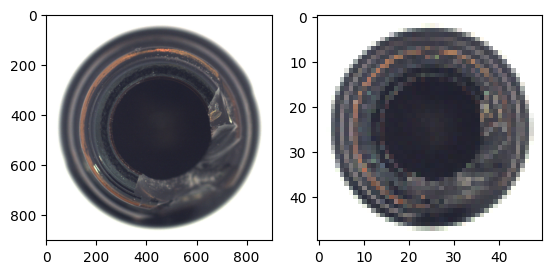

In [64]:
import matplotlib as mpl

img = cv2.imread("./assets/000.png")
ArrayAttr(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(img)
img = cv2.resize(img, (50, 50))
ArrayAttr(img)
plt.subplot(122)
plt.imshow(img)

维度数(秩)：2; 元素类型：uint8; 数组的维度形状：(50, 150); 元素个数：7500; 元素的字节大小：1
维度数(秩)：2; 元素类型：uint8; 数组的维度形状：(150, 50); 元素个数：7500; 元素的字节大小：1
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(3, 50, 50); 元素个数：7500; 元素的字节大小：1
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 50, 3); 元素个数：7500; 元素的字节大小：1
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 50, 3); 元素个数：7500; 元素的字节大小：1
True


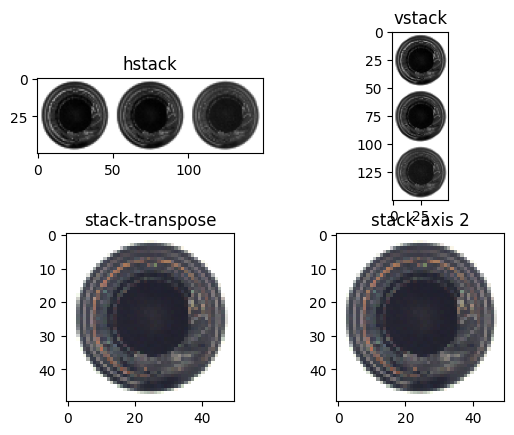

In [66]:
img_r, img_g, img_b = cv2.split(img)

img_hs = np.hstack((img_r, img_g, img_b))
ArrayAttr(img_hs)

img_vs = np.vstack((img_r, img_g, img_b))
ArrayAttr(img_vs)

img_s = np.stack((img_r, img_g, img_b), axis=0)
ArrayAttr(img_s)
img_st = np.transpose(img_s, (1, 2, 0))
ArrayAttr(img_st)

img_s2 = np.stack((img_r, img_g, img_b), axis=2)
ArrayAttr(img_s2)

print(np.array_equal(img_st, img_s2))

plt.subplot(221); plt.title("hstack")
plt.imshow(img_hs, cmap="gray")
plt.subplot(222); plt.title("vstack")
plt.imshow(img_vs, cmap="gray")
plt.subplot(223); plt.title("stack-transpose")
plt.imshow(img_st)
plt.subplot(224); plt.title("stack axis 2")
plt.imshow(img_s2)

分割数组
|函数|数组及操作|
|:---|:---|
|split|将一个数组分割为多个子数组|
|hsplit|将一个数组水平分割为多个子数组（按列）|
|vsplit|将一个数组垂直分割为多个子数组（按行）|

img:
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 50, 3); 元素个数：7500; 元素的字节大小：1
img_sp size:  2
其中每个数组信息：
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(25, 50, 3); 元素个数：3750; 元素的字节大小：1
img_sp3 size:  3
其中数组信息：
第0个数组：
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(20, 50, 3); 元素个数：3000; 元素的字节大小：1
第1个数组：
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(15, 50, 3); 元素个数：2250; 元素的字节大小：1
第2个数组：
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(15, 50, 3); 元素个数：2250; 元素的字节大小：1
img_1_sp3 size:  3
其中数组信息：
第0个数组：
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 20, 3); 元素个数：3000; 元素的字节大小：1
第1个数组：
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 15, 3); 元素个数：2250; 元素的字节大小：1
第2个数组：
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 15, 3); 元素个数：2250; 元素的字节大小：1
img_1_sp3 size:  3
其中数组信息：
第0个数组：
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 50, 1); 元素个数：2500; 元素的字节大小：1
第1个数组：
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 50, 1); 元素个数：2500; 元素的字节大小：1
第2个数组：
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 50, 1); 元素个数：2500; 元素的字节大小：1
img_hsp size:  2
其中数组信息：
第0个数组：
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 25, 3); 元素个数：3750; 元素的字节大小：1
第1个数组：
维度数(秩)：3; 元素类型：uint8

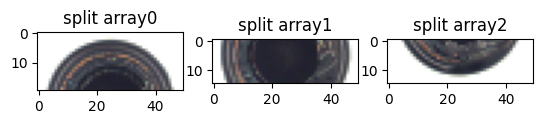

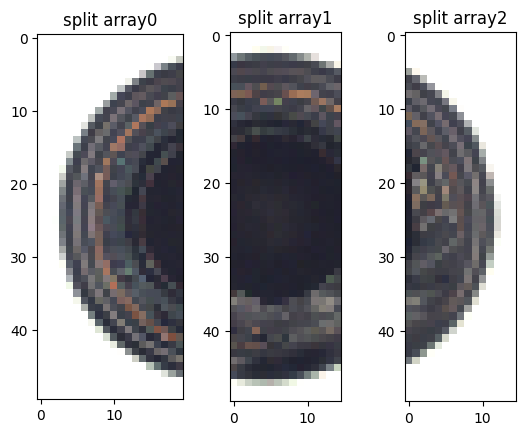

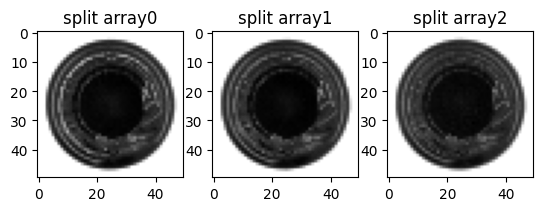

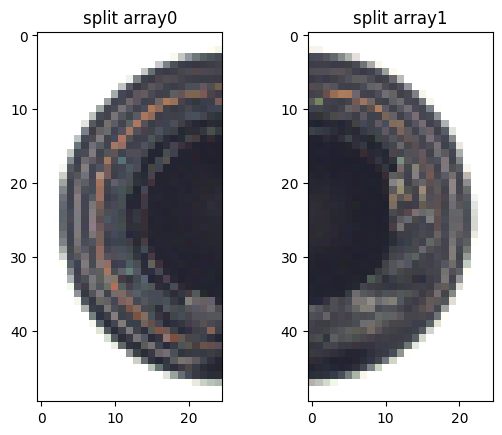

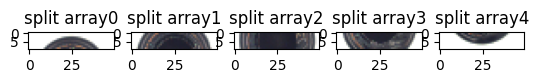

In [86]:
print("img:")
ArrayAttr(img)
img_sp = np.split(img, 2)
print("img_sp size: ", len(img_sp))
print("其中每个数组信息：")
ArrayAttr(img_sp[0])

img_sp3 = np.split(img, [20, 35])
print("img_sp3 size: ", len(img_sp3))
print("其中数组信息：")
fig1 = plt.figure()
for i in range(len(img_sp3)):
    print(f"第{i}个数组：")
    ArrayAttr(img_sp3[i])
    ax = fig1.add_subplot(1, len(img_sp3), i + 1); plt.title(f"split array{i}")
    plt.imshow(img_sp3[i])

img_1_sp3 = np.split(img, [20, 35], axis=1)
print("img_1_sp3 size: ", len(img_sp3))
print("其中数组信息：")
fig2 = plt.figure()
for i in range(len(img_1_sp3)):
    print(f"第{i}个数组：")
    ArrayAttr(img_1_sp3[i])
    ax = fig2.add_subplot(1, len(img_1_sp3), i + 1); plt.title(f"split array{i}")
    plt.imshow(img_1_sp3[i])


img_2_sp3 = np.split(img, 3, axis=2)
print("img_1_sp3 size: ", len(img_2_sp3))
print("其中数组信息：")
fig3 = plt.figure()
for i in range(len(img_2_sp3)):
    print(f"第{i}个数组：")
    ArrayAttr(img_2_sp3[i])
    ax = fig3.add_subplot(1, len(img_2_sp3), i + 1); plt.title(f"split array{i}")
    plt.imshow(img_2_sp3[i], cmap="gray")

# 与split axis=1 等价
img_hsp = np.hsplit(img, 2)
print("img_hsp size: ", len(img_hsp))
print("其中数组信息：")
fig4 = plt.figure()
for i in range(len(img_hsp)):
    print(f"第{i}个数组：")
    ArrayAttr(img_hsp[i])
    ax = fig4.add_subplot(1, len(img_hsp), i + 1); plt.title(f"split array{i}")
    plt.imshow(img_hsp[i])

# 与split axis=0 等价
img_vsp = np.vsplit(img, 5)
print("img_hsp size: ", len(img_vsp))
print("其中数组信息：")
fig5 = plt.figure()
for i in range(len(img_vsp)):
    print(f"第{i}个数组：")
    ArrayAttr(img_vsp[i])
    ax = fig5.add_subplot(1, len(img_vsp), i + 1); plt.title(f"split array{i}")
    plt.imshow(img_vsp[i])

数组元素的添加与删除        
|函数|元素及描述|
|:---|:---|
|resize|返回指定形状的新数组|
|append|将值添加到数组末尾|
|insert|沿指定轴将值插入到指定下标之前|
|delete|删掉某个轴的子数组，并返回删除后的新数组|
|unique|查找数组内的唯一元素|

维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 50, 3); 元素个数：7500; 元素的字节大小：1
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(100, 50, 3); 元素个数：15000; 元素的字节大小：1
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 100, 3); 元素个数：15000; 元素的字节大小：1
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(100, 100, 3); 元素个数：30000; 元素的字节大小：1
a:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 4); 元素个数：12; 元素的字节大小：8
b2:
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11  0  1  2  3]
 [ 4  5  6  7  8  9 10 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 8); 元素个数：24; 元素的字节大小：8
b3:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [ 0  1  2  3  4  5]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 6); 元素个数：18; 元素的字节大小：8
a_f:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
a_f_ex:
 [ 0  1  2  3  4  5  6  7  8  9 10 11  0  1  2  3  4  5]
b4:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [ 0  1  2  3  4  5]]
True
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(100, 100, 3); 元素个数：30000; 元素的字节大小：1


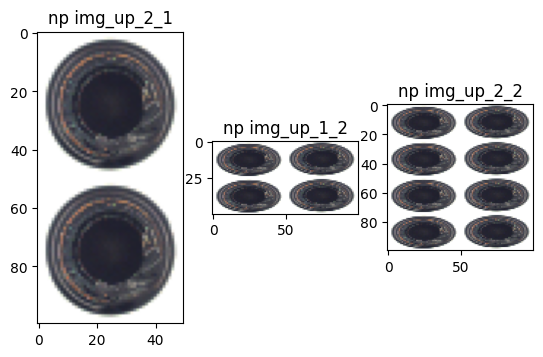

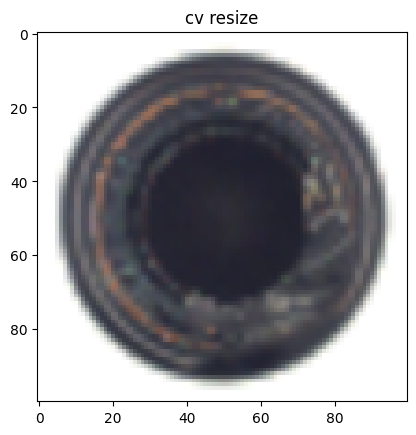

In [106]:
ArrayAttr(img)
img_up_2_1 = np.resize(img, (100, 50, 3))
ArrayAttr(img_up_2_1)
img_up_1_2 = np.resize(img, (50, 100, 3))
ArrayAttr(img_up_1_2)
img_up_2_2 = np.resize(img, (100, 100, 3))
ArrayAttr(img_up_2_2)
fig1 = plt.figure()
fig1.add_subplot(1, 3, 1); plt.title("np img_up_2_1")
plt.imshow(img_up_2_1)
fig1.add_subplot(1, 3, 2); plt.title("np img_up_1_2")
plt.imshow(img_up_1_2)
fig1.add_subplot(1, 3, 3); plt.title("np img_up_2_2")
plt.imshow(img_up_2_2)
# 在扩充列维度时，并不与期望的相同，使用简单数组进行观察
a = np.arange(12).reshape((3, 4))
print("a:\n", a)
ArrayAttr(a)
b2 = np.resize(a, (3, 8))
print("b2:\n", b2)
ArrayAttr(b2)
b3 = np.resize(a, (3, 6))
print("b3:\n", b3)
ArrayAttr(b3)
# 猜想，该resize方法将数组先拉平再进行复制扩充再进行reshape操作
# 拉平
a_f = a.flatten()
print("a_f:\n", a_f)
# 扩充 以扩大为(3, 6)，增加6个元素
a_f_ex = np.append(a_f, a_f[:6])
print("a_f_ex:\n", a_f_ex)
# 重新reshape
b4 = a_f_ex.reshape((3, 6))
print("b4:\n", b4)
print(np.array_equal(b3, b4))
# numpy resize 不适合处理图像的缩放

img_up_2_cv = cv2.resize(img, (100, 100))
ArrayAttr(img_up_2_cv)
fig2 = plt.figure()
fig2.add_subplot(1, 1, 1); plt.title("cv resize")
plt.imshow(img_up_2_cv)

维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 50, 3); 元素个数：7500; 元素的字节大小：1
维度数(秩)：1; 元素类型：uint8; 数组的维度形状：(15000,); 元素个数：15000; 元素的字节大小：1
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(100, 50, 3); 元素个数：15000; 元素的字节大小：1
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 100, 3); 元素个数：15000; 元素的字节大小：1
维度数(秩)：3; 元素类型：uint8; 数组的维度形状：(50, 50, 6); 元素个数：15000; 元素的字节大小：1


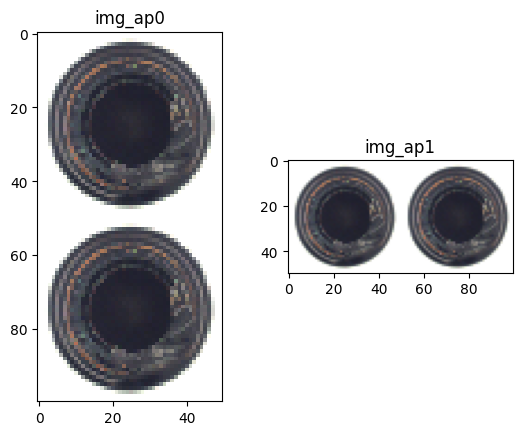

In [112]:
ArrayAttr(img)
img_apn = np.append(img, img)
# append 未设置axis时，返回始终为1维数组
ArrayAttr(img_apn)

img_ap0 = np.append(img, img, axis=0)
ArrayAttr(img_ap0)
img_ap1 = np.append(img, img, axis=1)
ArrayAttr(img_ap1)
img_ap2 = np.append(img, img, axis=2)
ArrayAttr(img_ap2)

plt.subplot(1, 2, 1); plt.title("img_ap0")
plt.imshow(img_ap0)
plt.subplot(1, 2, 2); plt.title("img_ap1")
plt.imshow(img_ap1)

In [122]:
print("a:\n", a)
ArrayAttr(a)

# 未提供轴，则输入数组会被展开
b = np.insert(a, 3, [12, 13, 14])
print("b:\n", b, end=SplitLine)

# 提供axis时，将会在该位置插入数组
b0 = np.insert(a, 2, [12, 13, 14, 15], axis=0)
print("b0:\n", b0)
ArrayAttr(b0)
# 提供axis时，插入的数组应于其数组shape应与其保持一致，或者能够进行广播保持一致
b0t = np.insert(a, 2, [12,], axis=0)
print("b0t:\n", b0t)
ArrayAttr(b0t)

b1 = np.insert(a, 4, [12, 13, 14], axis=1)
print("b1:\n", b1)
ArrayAttr(b1)
b1t = np.insert(a, 4, [[12,],[13,]], axis=1)
print("b1t:\n", b1t)
ArrayAttr(b1t)

a:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 4); 元素个数：12; 元素的字节大小：8
b:
 [ 0  1  2 12 13 14  3  4  5  6  7  8  9 10 11]
b0:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [12 13 14 15]
 [ 8  9 10 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(4, 4); 元素个数：16; 元素的字节大小：8
b0t:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [12 12 12 12]
 [ 8  9 10 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(4, 4); 元素个数：16; 元素的字节大小：8
b1:
 [[ 0  1  2  3 12]
 [ 4  5  6  7 13]
 [ 8  9 10 11 14]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 5); 元素个数：15; 元素的字节大小：8
b1t:
 [[ 0  1  2  3 12 13]
 [ 4  5  6  7 12 13]
 [ 8  9 10 11 12 13]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 6); 元素个数：18; 元素的字节大小：8


In [132]:
print("a:\n", a)
ArrayAttr(a)
# 未传递 Axis 参数。 在删除之前输入数组会被展开
b = np.delete(a, 6)
print("b:\n", b)
ArrayAttr(b)

b0 = np.delete(a, 1, axis=0)
print("b0:\n", b0)
ArrayAttr(b0)

b1 = np.delete(a, 3, axis=1)
print("b1:\n", b1)
ArrayAttr(b1)

bs0 = np.delete(a, np.s_[::2])
print("bs0:\n", bs0)
ArrayAttr(bs0)
bs1 = np.delete(a, np.s_[1:12:2])
print("bs1:\n", bs1)
ArrayAttr(bs1)

bs00 = np.delete(a, np.s_[:2], axis=0)
print("bs00:\n", bs00)
ArrayAttr(bs00)

bs11 = np.delete(a, np.s_[1:3], axis=1)
print("bs11:\n", bs11)
ArrayAttr(bs11)

a:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 4); 元素个数：12; 元素的字节大小：8
b:
 [ 0  1  2  3  4  5  7  8  9 10 11]
维度数(秩)：1; 元素类型：int64; 数组的维度形状：(11,); 元素个数：11; 元素的字节大小：8
b0:
 [[ 0  1  2  3]
 [ 8  9 10 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(2, 4); 元素个数：8; 元素的字节大小：8
b1:
 [[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 3); 元素个数：9; 元素的字节大小：8
bs0:
 [ 1  3  5  7  9 11]
维度数(秩)：1; 元素类型：int64; 数组的维度形状：(6,); 元素个数：6; 元素的字节大小：8
bs1:
 [ 0  2  4  6  8 10]
维度数(秩)：1; 元素类型：int64; 数组的维度形状：(6,); 元素个数：6; 元素的字节大小：8
bs00:
 [[ 8  9 10 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(1, 4); 元素个数：4; 元素的字节大小：8
bs11:
 [[ 0  3]
 [ 4  7]
 [ 8 11]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 2); 元素个数：6; 元素的字节大小：8


In [138]:
print("a:\n", a)
ArrayAttr(a)

ar = np.tile(a, (2,2))
print("ar:\n", ar)
ArrayAttr(ar)

au = np.unique(a)
print("au:\n", au)
ArrayAttr(au)

# return_index：如果为true，返回新列表元素在旧列表中的位置（下标），并以列表形式储
# return_inverse：如果为true，返回旧列表元素在新列表中的位置（下标），并以列表形式储
# return_counts：如果为true，返回去重数组中的元素在原数组中的出现次数
au, a_index, a_inverse, a_counts = np.unique(ar, True, True, True)
print("au:\n", au)
print("a_index:\n", a_index)
print("a_inverse:\n", a_inverse)
a_inverse_ = a_inverse.reshape(ar.shape)
print("a_inverse_:\n", a_inverse_)
print("a_counts:\n", a_counts)

a:
 [[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(3, 4); 元素个数：12; 元素的字节大小：8
ar:
 [[ 0  2  4  6  0  2  4  6]
 [ 8 10 12 14  8 10 12 14]
 [16 18 20 22 16 18 20 22]
 [ 0  2  4  6  0  2  4  6]
 [ 8 10 12 14  8 10 12 14]
 [16 18 20 22 16 18 20 22]]
维度数(秩)：2; 元素类型：int64; 数组的维度形状：(6, 8); 元素个数：48; 元素的字节大小：8
au:
 [ 0  2  4  6  8 10 12 14 16 18 20 22]
维度数(秩)：1; 元素类型：int64; 数组的维度形状：(12,); 元素个数：12; 元素的字节大小：8
au:
 [ 0  2  4  6  8 10 12 14 16 18 20 22]
a_index:
 [ 0  1  2  3  8  9 10 11 16 17 18 19]
a_inverse:
 [ 0  1  2  3  0  1  2  3  4  5  6  7  4  5  6  7  8  9 10 11  8  9 10 11
  0  1  2  3  0  1  2  3  4  5  6  7  4  5  6  7  8  9 10 11  8  9 10 11]
a_inverse_:
 [[ 0  1  2  3  0  1  2  3]
 [ 4  5  6  7  4  5  6  7]
 [ 8  9 10 11  8  9 10 11]
 [ 0  1  2  3  0  1  2  3]
 [ 4  5  6  7  4  5  6  7]
 [ 8  9 10 11  8  9 10 11]]
a_counts:
 [4 4 4 4 4 4 4 4 4 4 4 4]
